In [151]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

font = {'family' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)

In [152]:
cor_se_ = pd.read_csv('cor-se-suspeitos-2020-2021.csv', sep=';', encoding = "ISO-8859-1",
                     skiprows=[0,1,2,3,12,13,14,15])
cor_se = cor_se_[cor_se_.columns[1:]].apply(pd.to_numeric, errors='coerce').fillna(0)
cor_se['Cor'] = cor_se_['Cor']

print('\nÓbitos confirmados de COVID - Raça / Semana Epidemiológica')
display(cor_se)


Óbitos confirmados de COVID - Raça / Semana Epidemiológica


,SE 20 08,SE 20 11,SE 20 12,SE 20 13,SE 20 14,SE 20 15,SE 20 16,SE 20 17,SE 20 18,SE 20 19,SE 20 20,SE 20 21,SE 20 22,SE 20 23,SE 20 24,SE 20 25,SE 20 26,SE 20 27,SE 20 28,SE 20 29,SE 20 30,SE 20 31,SE 20 32,SE 20 33,SE 20 34,SE 20 35,SE 20 36,SE 20 37,SE 20 38,SE 20 39,SE 20 40,SE 20 41,SE 20 42,SE 20 43,SE 20 44,SE 20 45,SE 20 46,SE 20 47,SE 20 48,SE 20 49,SE 20 50,SE 20 51,SE 20 52,SE 20 53,SE 21 01,SE 21 02,SE 21 03,SE 21 04,SE 21 05,SE 21 06,SE 21 07,SE 21 08,SE 21 09,SE 21 10,Total,Cor
0,1.0,3.0,48.0,178,361.0,439,442.0,500,637.0,618,687,668,691.0,659,659,560,490.0,426.0,440.0,442,410.0,356.0,378.0,334.0,283.0,303.0,239.0,240,212.0,164,176.0,137.0,106.0,93.0,105.0,106,138.0,159.0,192.0,227.0,263,302.0,285.0,283.0,339.0,357.0,381,351.0,333,305.0,265.0,306.0,388,44.0,17509,Branca
1,0.0,0.0,2.0,15,55.0,65,55.0,78,104.0,86,121,85,107.0,117,112,97,77.0,77.0,60.0,69,62.0,42.0,41.0,52.0,43.0,28.0,35.0,31,35.0,27,23.0,20.0,20.0,18.0,9.0,14,16.0,16.0,30.0,27.0,40,39.0,44.0,38.0,38.0,55.0,61,49.0,52,33.0,35.0,42.0,50,9.0,2556,Preta
2,0.0,0.0,2.0,10,16.0,17,19.0,28,24.0,30,18,19,19.0,22,24,15,16.0,21.0,11.0,19,5.0,13.0,18.0,11.0,12.0,11.0,11.0,11,6.0,5,5.0,4.0,7.0,4.0,6.0,2,6.0,10.0,9.0,8.0,11,11.0,15.0,20.0,10.0,12.0,5,15.0,11,8.0,4.0,10.0,13,1.0,640,Amarela
3,0.0,0.0,5.0,37,127.0,171,187.0,207,284.0,304,300,328,272.0,262,270,210,176.0,157.0,151.0,142,150.0,130.0,143.0,132.0,104.0,88.0,81.0,85,66.0,54,55.0,56.0,47.0,32.0,37.0,38,42.0,48.0,50.0,77.0,66,83.0,81.0,83.0,93.0,104.0,105,124.0,122,71.0,85.0,102.0,120,20.0,6364,Parda
4,0.0,0.0,0.0,1,0.0,2,0.0,1,0.0,2,1,1,0.0,1,1,1,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,1,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,1,0.0,1,0.0,0.0,0.0,1,0.0,19,Indígena
5,0.0,0.0,0.0,12,17.0,25,28.0,22,41.0,41,40,34,36.0,45,30,36,17.0,19.0,15.0,30,30.0,26.0,14.0,26.0,12.0,12.0,18.0,7,9.0,8,11.0,5.0,7.0,6.0,7.0,3,3.0,1.0,7.0,9.0,15,16.0,11.0,11.0,19.0,15.0,14,13.0,14,15.0,10.0,15.0,17,3.0,897,Não informado
6,1.0,3.0,57.0,253,576.0,719,731.0,836,1090.0,1081,1167,1135,1125.0,1106,1096,919,776.0,700.0,677.0,703,657.0,567.0,594.0,555.0,454.0,442.0,384.0,375,328.0,259,270.0,222.0,187.0,153.0,164.0,164,205.0,234.0,288.0,348.0,396,451.0,436.0,435.0,499.0,543.0,567,552.0,533,432.0,399.0,475.0,589,77.0,27985,Total


In [153]:
pop_cor_idade_ = pd.read_csv('cor-idade-pop-2010.csv', sep=';', encoding = "ISO-8859-1",
                     skiprows=[0,1,2,11])
pop_cor_idade = pop_cor_idade_[pop_cor_idade_.columns[1:]].apply(pd.to_numeric, errors='coerce').fillna(0)
pop_cor_idade['Cor'] = pop_cor_idade_['Raça / Cor']

print('\n\nPopulação - Raça / Idade')
display(pop_cor_idade.head(10))



População - Raça / Idade


,0 a 4,5 a 9,10 a 14,15 a 19,20 a 24,25 a 29,30 a 34,35 a 39,40 a 44,45 a 49,50 a 54,55 a 59,60 a 64,65 a 69,70 a 74,75 e mais,Ignorada,Total,Cor
0,444168,433860,466843,462715,570950,636194,599762,524122,485640,465774,425601,358120,283006,208206,169901,128717,161089.0,6824668,Branca
1,29954,39476,52706,56272,68610,75869,73139,64755,59093,51910,47914,37809,27559,18537,13717,9097,9666.0,736083,Preta
2,8329,9020,10726,12276,17282,21097,20445,18141,17467,17002,17422,17874,17175,13987,11468,7516,9017.0,246244,Amarela
3,227650,275068,336289,309997,333423,339887,315436,280563,249819,207196,175970,133704,94896,61310,41992,25485,24533.0,3433218,Parda
4,813,840,843,982,1352,1484,1256,1072,939,823,734,590,413,293,221,152,170.0,12977,Indígena
5,13,15,23,15,42,52,38,31,21,15,17,16,6,5,2,2,0.0,313,Ignorado
6,710927,758279,867430,842257,991659,1074583,1010076,888684,812979,742720,667658,548113,423055,302338,237301,170969,204475.0,11253503,Total


**Agrupando Negros e Pardos**

In [154]:
PRETA, PARDA = 1, 3
cor_se.iloc[PRETA, :-1] = cor_se.iloc[PRETA,:-1] + cor_se.iloc[PARDA,:-1]
cor_se = cor_se.drop(PARDA) 
display(cor_se)

,SE 20 08,SE 20 11,SE 20 12,SE 20 13,SE 20 14,SE 20 15,SE 20 16,SE 20 17,SE 20 18,SE 20 19,SE 20 20,SE 20 21,SE 20 22,SE 20 23,SE 20 24,SE 20 25,SE 20 26,SE 20 27,SE 20 28,SE 20 29,SE 20 30,SE 20 31,SE 20 32,SE 20 33,SE 20 34,SE 20 35,SE 20 36,SE 20 37,SE 20 38,SE 20 39,SE 20 40,SE 20 41,SE 20 42,SE 20 43,SE 20 44,SE 20 45,SE 20 46,SE 20 47,SE 20 48,SE 20 49,SE 20 50,SE 20 51,SE 20 52,SE 20 53,SE 21 01,SE 21 02,SE 21 03,SE 21 04,SE 21 05,SE 21 06,SE 21 07,SE 21 08,SE 21 09,SE 21 10,Total,Cor
0,1.0,3.0,48.0,178,361.0,439,442.0,500,637.0,618,687,668,691.0,659,659,560,490.0,426.0,440.0,442,410.0,356.0,378.0,334.0,283.0,303.0,239.0,240,212.0,164,176.0,137.0,106.0,93.0,105.0,106,138.0,159.0,192.0,227.0,263,302.0,285.0,283.0,339.0,357.0,381,351.0,333,305.0,265.0,306.0,388,44.0,17509,Branca
1,0.0,0.0,7.0,52,182.0,236,242.0,285,388.0,390,421,413,379.0,379,382,307,253.0,234.0,211.0,211,212.0,172.0,184.0,184.0,147.0,116.0,116.0,116,101.0,81,78.0,76.0,67.0,50.0,46.0,52,58.0,64.0,80.0,104.0,106,122.0,125.0,121.0,131.0,159.0,166,173.0,174,104.0,120.0,144.0,170,29.0,8920,Preta
2,0.0,0.0,2.0,10,16.0,17,19.0,28,24.0,30,18,19,19.0,22,24,15,16.0,21.0,11.0,19,5.0,13.0,18.0,11.0,12.0,11.0,11.0,11,6.0,5,5.0,4.0,7.0,4.0,6.0,2,6.0,10.0,9.0,8.0,11,11.0,15.0,20.0,10.0,12.0,5,15.0,11,8.0,4.0,10.0,13,1.0,640,Amarela
4,0.0,0.0,0.0,1,0.0,2,0.0,1,0.0,2,1,1,0.0,1,1,1,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,1,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,1,0.0,1,0.0,0.0,0.0,1,0.0,19,Indígena
5,0.0,0.0,0.0,12,17.0,25,28.0,22,41.0,41,40,34,36.0,45,30,36,17.0,19.0,15.0,30,30.0,26.0,14.0,26.0,12.0,12.0,18.0,7,9.0,8,11.0,5.0,7.0,6.0,7.0,3,3.0,1.0,7.0,9.0,15,16.0,11.0,11.0,19.0,15.0,14,13.0,14,15.0,10.0,15.0,17,3.0,897,Não informado
6,1.0,3.0,57.0,253,576.0,719,731.0,836,1090.0,1081,1167,1135,1125.0,1106,1096,919,776.0,700.0,677.0,703,657.0,567.0,594.0,555.0,454.0,442.0,384.0,375,328.0,259,270.0,222.0,187.0,153.0,164.0,164,205.0,234.0,288.0,348.0,396,451.0,436.0,435.0,499.0,543.0,567,552.0,533,432.0,399.0,475.0,589,77.0,27985,Total


In [155]:
pop_cor_idade.iloc[PRETA,:-1] = pop_cor_idade.iloc[PRETA,:-1] + pop_cor_idade.iloc[PARDA,:-1]
pop_cor_idade = pop_cor_idade.drop(PARDA)
display(pop_cor_idade)

,0 a 4,5 a 9,10 a 14,15 a 19,20 a 24,25 a 29,30 a 34,35 a 39,40 a 44,45 a 49,50 a 54,55 a 59,60 a 64,65 a 69,70 a 74,75 e mais,Ignorada,Total,Cor
0,444168,433860,466843,462715,570950,636194,599762,524122,485640,465774,425601,358120,283006,208206,169901,128717,161089.0,6824668,Branca
1,257604,314544,388995,366269,402033,415756,388575,345318,308912,259106,223884,171513,122455,79847,55709,34582,34199.0,4169301,Preta
2,8329,9020,10726,12276,17282,21097,20445,18141,17467,17002,17422,17874,17175,13987,11468,7516,9017.0,246244,Amarela
4,813,840,843,982,1352,1484,1256,1072,939,823,734,590,413,293,221,152,170.0,12977,Indígena
5,13,15,23,15,42,52,38,31,21,15,17,16,6,5,2,2,0.0,313,Ignorado
6,710927,758279,867430,842257,991659,1074583,1010076,888684,812979,742720,667658,548113,423055,302338,237301,170969,204475.0,11253503,Total


**Taxa de Mortalidade: Corrigindo pela população de cada cor**

In [156]:
cor_se_norm = cor_se.loc[:, cor_se.columns[1:-2]]
cor_se_norm = cor_se_norm.cumsum(axis=1)

cor_se_norm['Cor'] = cor_se['Cor']
cor_se_norm['Habitantes'] = pop_cor_idade.loc[:,'Total']
cor_se_norm = cor_se_norm.drop([5, 6]) # Não informado

cor_se_norm = cor_se_norm.melt(id_vars=['Cor', 'Habitantes'], value_vars = cor_se_norm.columns[1:-2],
                               var_name='Semana Epidemiológica', value_name='Óbitos')

cor_se_norm['Óbitos por 100 mil'] = (100_000 * cor_se_norm['Óbitos']) / cor_se_norm['Habitantes']
display(cor_se_norm.tail())

,Cor,Habitantes,Semana Epidemiológica,Óbitos,Óbitos por 100 mil
203,Indígena,12977,SE 21 09,19.0,146.412884
204,Branca,6824668,SE 21 10,17508.0,256.539952
205,Preta,4169301,SE 21 10,8920.0,213.944736
206,Amarela,246244,SE 21 10,640.0,259.904810
207,Indígena,12977,SE 21 10,19.0,146.412884


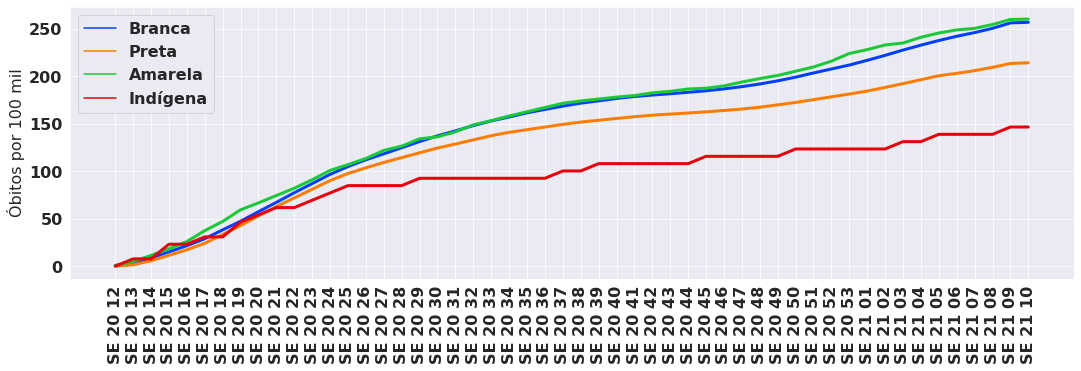

In [157]:
fig, axs = plt.subplots(figsize=(18, 5))
sns.lineplot(data=cor_se_norm, x='Semana Epidemiológica', y='Óbitos por 100 mil', hue='Cor', palette='bright', lw=3)
plt.xticks(rotation=90)
plt.legend()
plt.xlabel('')
plt.show()

**Corrigindo por Idade**

In [158]:
df = pop_cor_idade.iloc[:-2].drop('Ignorada', axis=1)
df = df.melt(id_vars=['Cor', 'Total'], value_vars=df.columns[:-2], var_name='Faixa Etária', value_name="Habitantes")
df.loc[:, 'Habitantes'] = pd.to_numeric(df['Habitantes'], errors='coerce')
df.loc[:, 'Total'] = pd.to_numeric(df['Total'], errors='coerce')
df['Habitantes por total cor'] = df['Habitantes'] / df.loc[:, 'Total']
display(df.head())

,Cor,Total,Faixa Etária,Habitantes,Habitantes por total cor
0,Branca,6824668,0 a 4,444168,0.065083
1,Preta,4169301,0 a 4,257604,0.061786
2,Amarela,246244,0 a 4,8329,0.033824
3,Indígena,12977,0 a 4,813,0.062649
4,Branca,6824668,5 a 9,433860,0.063572


(0.0, 0.14)

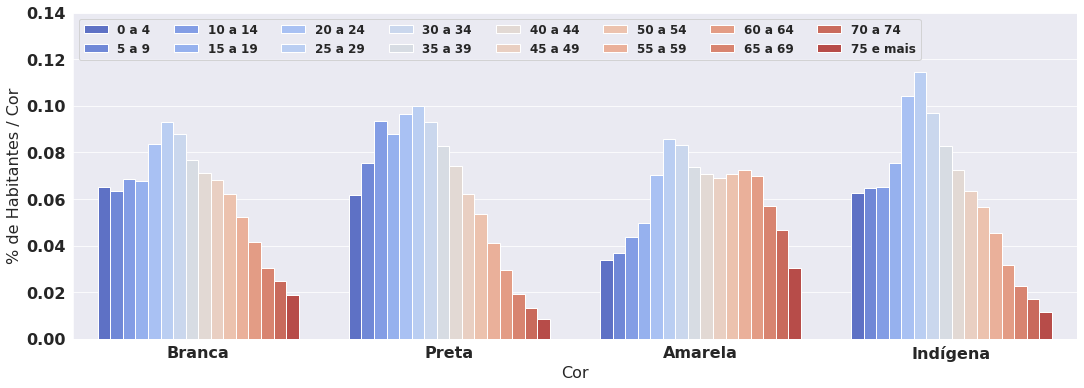

In [159]:
fig, axs = plt.subplots(figsize=(18, 6))
sns.barplot(data=df, hue='Faixa Etária', y='Habitantes por total cor', x='Cor', ax=axs, palette='coolwarm')
plt.legend(loc='upper left', ncol=len(pop_cor_idade.columns[1:-1])//2, fontsize=12)
plt.ylabel('% de Habitantes / Cor')
plt.ylim(0, 0.14)

In [160]:
cor_idade_ = pd.read_csv('cor-idade-suspeitos-2020-2021.csv', sep=';', encoding = "ISO-8859-1",
                     skiprows=[0,1,2,3,12,13,14,15])

cor_idade = cor_idade_.apply(pd.to_numeric, errors='coerce').fillna(0)
cor_idade.iloc[PRETA] = cor_idade.iloc[PRETA] + cor_idade.iloc[PARDA]
cor_idade = cor_idade.drop(PARDA)
cor_idade = cor_idade.drop(5) # Não informado
cor_idade['Cor'] = cor_idade_['Cor']

print('\n\nÓbitos confirmados de COVID - Raça / Idade')
display(cor_idade)



Óbitos confirmados de COVID - Raça / Idade


,Cor,0-4a,5-9a,10-14a,15-19a,20-24a,25-29a,30-34a,35-39a,40-44a,45-49a,50-54a,55-59a,60-64a,65-69a,70-74a,75 e mais,Ign,Total
0,Branca,19.0,8.0,9.0,21.0,45.0,64.0,150.0,219.0,310.0,405.0,644.0,1021.0,1511.0,1879.0,2132.0,9069.0,3.0,17509.0
1,Preta,19.0,7.0,7.0,22.0,42.0,61.0,127.0,209.0,340.0,411.0,598.0,732.0,1036.0,1169.0,1170.0,2966.0,4.0,8920.0
2,Amarela,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,3.0,9.0,11.0,30.0,36.0,53.0,79.0,415.0,0.0,640.0
4,Indígena,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,2.0,3.0,8.0,0.0,19.0
6,Total,41.0,15.0,17.0,47.0,92.0,127.0,281.0,445.0,673.0,858.0,1296.0,1862.0,2673.0,3205.0,3491.0,12853.0,9.0,27985.0


In [161]:
cor_idade_melt = cor_idade.melt(id_vars=['Cor', 'Total'], value_vars=cor_idade.columns[1:-2],
                                var_name='Faixa Etária', value_name='Óbitos')

cores = list(pop_cor_idade['Cor'].values)
faixa_etaria = { cor_idade.columns[k+1]: k for k in range(len(cor_idade.columns[1:-2])) }
habitantes = []
for i in range(len(cor_idade_melt)):
  linha = cor_idade_melt.iloc[i]
  hab = pop_cor_idade.iloc[cores.index(linha['Cor']), faixa_etaria[linha['Faixa Etária']]  ]
  habitantes.append(hab)

cor_idade_melt['Habitantes'] = habitantes
display(cor_idade_melt.tail(20))

,Cor,Total,Faixa Etária,Óbitos,Habitantes
60,Branca,17509.0,60-64a,1511.0,283006
61,Preta,8920.0,60-64a,1036.0,122455
62,Amarela,640.0,60-64a,36.0,17175
63,Indígena,19.0,60-64a,0.0,413
64,Total,27985.0,60-64a,2673.0,423055
65,Branca,17509.0,65-69a,1879.0,208206
66,Preta,8920.0,65-69a,1169.0,79847
67,Amarela,640.0,65-69a,53.0,13987
68,Indígena,19.0,65-69a,2.0,293
69,Total,27985.0,65-69a,3205.0,302338


**População Padrão**

In [162]:
cor_idade_melt['Óbitos por 100 mil'] = (100_000 * cor_idade_melt['Óbitos']) / cor_idade_melt['Habitantes']
display(cor_idade_melt.head())

,Cor,Total,Faixa Etária,Óbitos,Habitantes,Óbitos por 100 mil
0,Branca,17509.0,0-4a,19.0,444168,4.277661
1,Preta,8920.0,0-4a,19.0,257604,7.375662
2,Amarela,640.0,0-4a,0.0,8329,0.000000
3,Indígena,19.0,0-4a,1.0,813,123.001230
4,Total,27985.0,0-4a,41.0,710927,5.767118


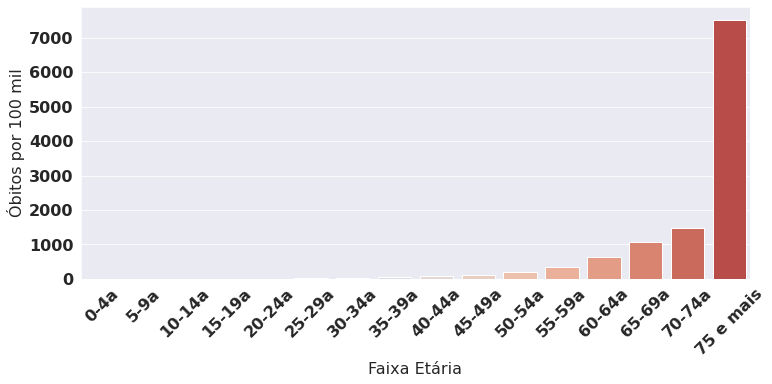

In [163]:
fig, axs = plt.subplots(figsize=(12, 5))
sns.barplot(data = cor_idade_melt[cor_idade_melt['Cor'] == 'Total'], x='Faixa Etária', 
            y='Óbitos por 100 mil', ax=axs, palette='coolwarm')
plt.xticks(rotation=45) 
plt.show()

**Referência x Realidade**

In [164]:
pop_padrao = cor_idade_melt[cor_idade_melt['Cor'] == 'Total']['Óbitos por 100 mil'].to_numpy()

cor_idade_melt['Esperados'] = cor_idade_melt['Habitantes'] * np.repeat(pop_padrao, 5) / 100_000
resultado = cor_idade_melt.groupby('Cor').sum() 
resultado = resultado.drop('Total')
display(resultado)
print('\n')

,Total,Óbitos,Habitantes,Óbitos por 100 mil,Esperados
Cor,,,,,
Amarela,10240.0,640.0,237227,7123.958726,1139.592370
Branca,280144.0,17506.0,6663579,10421.444416,19780.754109
Indígena,304.0,19.0,12807,8084.950575,26.872616
Preta,142720.0,8916.0,4135102,14085.302532,7028.349678


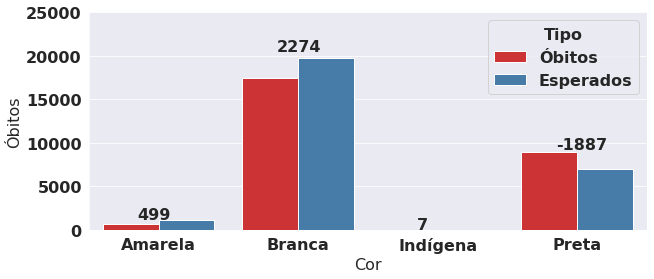

In [165]:
fig, axs = plt.subplots(figsize=(10, 4))
sns.barplot(data=resultado_melt, x='Cor', hue='Tipo', y='Óbitos', ax=axs, palette='Set1')

diff = (resultado['Esperados'] - resultado['Óbitos'] ).to_numpy() 
for k, d in enumerate(diff):
  altura = max(resultado['Esperados'].iloc[k], resultado['Óbitos'].iloc[k])
  plt.text(k-0.15, altura*1.04, str(int(d)) )

plt.ylim(0, 25000)
plt.show()

Text(0, 0.5, 'Óbitos por cor por 100 mil habitantes')

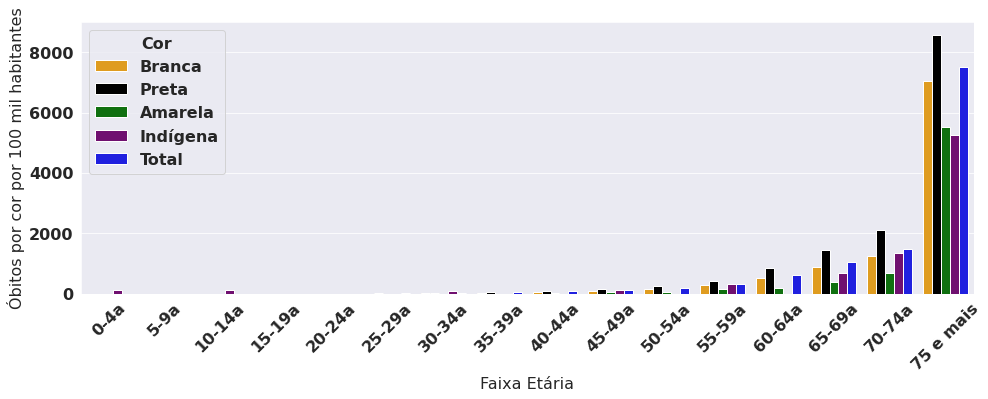

In [166]:
colors = ['orange', 'k', 'g', 'purple', 'b']
fig, axs = plt.subplots(figsize=(16, 5))
sns.barplot(data = cor_idade_melt, x='Faixa Etária', hue='Cor', 
            y='Óbitos por 100 mil', ax=axs, palette=sns.color_palette(colors) )
plt.xticks(rotation=45) 
plt.ylabel('Óbitos por cor por 100 mil habitantes')